In [2]:
print(df_ica.columns)

Index(['Fila', 'Dia', 'ICA_PM25'], dtype='object')


In [3]:
from google.colab import files
uploaded = files.upload()  # Selecciona ICA_PM25_2023.xlsx

import pandas as pd

# Cargar el archivo
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")

# Renombrar columnas si es necesario
df_ica_raw.columns = ["Año", "Dia", "ICA_PM25"]

# Crear columna Mes desde el número de día
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_raw["Mes"] = df_ica_raw["Dia"].apply(dia_a_mes)

# Reordenar columnas
df_ica = df_ica_raw[["Mes", "Año", "ICA_PM25"]]

# Verificar
df_ica.head()

Saving ICA_PM25_2023.xlsx to ICA_PM25_2023 (1).xlsx


,Mes,Año,ICA_PM25
0,Enero,0,Moderado
1,Enero,0,Moderado
2,Enero,0,Moderado
3,Enero,0,Moderado
4,Enero,0,Moderado


In [4]:
from google.colab import files
uploaded = files.upload()  # Selecciona ICA_PM25_2023.xlsx

import pandas as pd

# Cargar el archivo
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")

# Renombrar columnas si es necesario
df_ica_raw.columns = ["Año", "Dia", "ICA_PM25"]

# Crear columna Mes desde el número de día
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_raw["Mes"] = df_ica_raw["Dia"].apply(dia_a_mes)

# Reordenar columnas
df_ica = df_ica_raw[["Mes", "Año", "ICA_PM25"]]

# Verificar
df_ica.head()

Saving ICA_PM25_2023.xlsx to ICA_PM25_2023 (2).xlsx


,Mes,Año,ICA_PM25
0,Enero,0,Moderado
1,Enero,0,Moderado
2,Enero,0,Moderado
3,Enero,0,Moderado
4,Enero,0,Moderado


In [5]:
from google.colab import files
uploaded = files.upload()  # Selecciona ICA_PM25_2023.xlsx

import pandas as pd

# Cargar archivo original
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")

# Ajustar nombres de columnas según lo que vimos en tu archivo
df_ica_raw.columns = ["Año", "Dia", "ICA_PM25"]

# Función para convertir día en mes
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_raw["Mes"] = df_ica_raw["Dia"].apply(dia_a_mes)

# Reordenar columnas
df_ica = df_ica_raw[["Mes", "Año", "ICA_PM25"]]

# Verificar
df_ica.head()

Saving ICA_PM25_2023.xlsx to ICA_PM25_2023 (3).xlsx


,Mes,Año,ICA_PM25
0,Enero,0,Moderado
1,Enero,0,Moderado
2,Enero,0,Moderado
3,Enero,0,Moderado
4,Enero,0,Moderado


In [7]:
df["Año"] = pd.to_numeric(df["Año"], errors="coerce").astype("Int64")

In [9]:
# Subir archivos desde tu computador
from google.colab import files
uploaded = files.upload()  # ICA_PM25_2023.xlsx
uploaded = files.upload()  # df_total_energia.csv
uploaded = files.upload()  # Anomalias_Radiacion_SIATA_2017_2020.xlsx

import pandas as pd

# -------------------------------
# 1. Cargar y organizar ICA_PM25
# -------------------------------
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")
df_ica_raw.columns = ["Año", "Dia", "ICA_PM25"]

# Convertir día en mes
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_raw["Mes"] = df_ica_raw["Dia"].apply(dia_a_mes)
df_ica = df_ica_raw[["Mes", "Año", "ICA_PM25"]]

# -------------------------------
# 2. Cargar radiancia y anomalías
# -------------------------------
df_total_energia = pd.read_csv("df_total_energia.csv")
df_anomalias_radiacion = pd.read_excel("Anomalias_Radiacion_SIATA_2017_2020.xlsx")

# -------------------------------
# 3. Normalizar columnas y limpiar
# -------------------------------
for df in [df_ica, df_total_energia, df_anomalias_radiacion]:
    df["Año"] = pd.to_numeric(df["Año"], errors="coerce").astype("Int64")
    df["Mes"] = df["Mes"].astype(str).str.strip().str.capitalize()
    df.dropna(subset=["Año", "Mes"], inplace=True)

# -------------------------------
# 4. Merge Consolidado 1
# -------------------------------
df_consolidado1 = df_ica.merge(df_total_energia, on=["Mes","Año"], how="inner") \
                        .merge(df_anomalias_radiacion, on=["Mes","Año"], how="inner")

# -------------------------------
# 5. Exportar
# -------------------------------
df_consolidado1.to_excel("Consolidado1_ICA_Radiancia_ENSO.xlsx", index=False)
files.download("Consolidado1_ICA_Radiancia_ENSO.xlsx")

Saving ICA_PM25_2023.xlsx to ICA_PM25_2023 (4).xlsx


Saving df_total_energia.csv to df_total_energia (3).csv


Saving Anomalias_Radiacion_SIATA_2017_2020.xlsx to Anomalias_Radiacion_SIATA_2017_2020 (3).xlsx


/tmp/ipython-input-562621238.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Año"] = pd.to_numeric(df["Año"], errors="coerce").astype("Int64")
/tmp/ipython-input-562621238.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mes"] = df["Mes"].astype(str).str.strip().str.capitalize()
/tmp/ipython-input-562621238.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
print("ICA_PM25:", df_ica[["Mes", "Año"]].drop_duplicates())
print("Radiancia:", df_total_energia[["Mes", "Año"]].drop_duplicates())
print("Anomalías:", df_anomalias_radiacion[["Mes", "Año"]].drop_duplicates())

ICA_PM25:               Mes  Año
0           Enero    0
31        Febrero    0
59          Marzo    0
90          Abril    0
120          Mayo    0
...           ...  ...
14447      Agosto   39
14478  Septiembre   39
14508     Octubre   39
14539   Noviembre   39
14569   Diciembre   39

[480 rows x 2 columns]
Radiancia:            Mes   Año
0        Enero  2017
1      Febrero  2017
2        Marzo  2017
3        Abril  2017
4         Mayo  2017
5        Junio  2017
6        Julio  2017
7       Agosto  2017
8   Septiembre  2017
9      Octubre  2017
10   Noviembre  2017
11   Diciembre  2017
12       Enero  2018
13     Febrero  2018
14       Marzo  2018
15       Abril  2018
16        Mayo  2018
17       Junio  2018
18       Julio  2018
19      Agosto  2018
20  Septiembre  2018
21     Octubre  2018
22   Noviembre  2018
23   Diciembre  2018
24       Enero  2019
25     Febrero  2019
26       Marzo  2019
27       Abril  2019
28        Mayo  2019
29       Junio  2019
30       Julio  2019
31     

In [11]:
años_validos = df_ica["Año"].unique()

df_total_energia = df_total_energia[df_total_energia["Año"].isin(años_validos)]
df_anomalias_radiacion = df_anomalias_radiacion[df_anomalias_radiacion["Año"].isin(años_validos)]

In [12]:
df_consolidado1 = df_ica.merge(df_total_energia, on=["Mes","Año"], how="inner") \
                        .merge(df_anomalias_radiacion, on=["Mes","Año"], how="inner")

In [13]:
print("Filas en Consolidado 1:", len(df_consolidado1))
df_consolidado1.head()

Filas en Consolidado 1: 0


,Mes,Año,ICA_PM25,Energia_kWh_m2_dia,Fuente,Anomalia_W_m2,ENSO


In [14]:
# Subir archivos desde tu computador
from google.colab import files
uploaded = files.upload()  # ICA_PM25_2023.xlsx
uploaded = files.upload()  # df_total_energia.csv
uploaded = files.upload()  # Anomalias_Radiacion_SIATA_2017_2020.xlsx

import pandas as pd

# -------------------------------
# 1. Cargar y organizar ICA_PM25
# -------------------------------
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")
df_ica_raw.columns = ["Año", "Dia", "ICA_PM25"]

# Convertir día en mes
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_raw["Mes"] = df_ica_raw["Dia"].apply(dia_a_mes)
df_ica = df_ica_raw[["Mes", "Año", "ICA_PM25"]]

# -------------------------------
# 2. Cargar radiancia y anomalías
# -------------------------------
df_total_energia = pd.read_csv("df_total_energia.csv")
df_anomalias_radiacion = pd.read_excel("Anomalias_Radiacion_SIATA_2017_2020.xlsx")

# -------------------------------
# 3. Normalizar columnas y limpiar
# -------------------------------
for df in [df_ica, df_total_energia, df_anomalias_radiacion]:
    df["Año"] = pd.to_numeric(df["Año"], errors="coerce").astype("Int64")
    df["Mes"] = df["Mes"].astype(str).str.strip().str.capitalize()
    df.dropna(subset=["Año", "Mes"], inplace=True)

# -------------------------------
# 4. Filtrar años válidos para merge
# -------------------------------
años_validos = df_ica["Año"].unique()
df_total_energia = df_total_energia[df_total_energia["Año"].isin(años_validos)]
df_anomalias_radiacion = df_anomalias_radiacion[df_anomalias_radiacion["Año"].isin(años_validos)]

# -------------------------------
# 5. Merge Consolidado 1
# -------------------------------
df_consolidado1 = df_ica.merge(df_total_energia, on=["Mes","Año"], how="inner") \
                        .merge(df_anomalias_radiacion, on=["Mes","Año"], how="inner")

# -------------------------------
# 6. Exportar
# -------------------------------
df_consolidado1.to_excel("Consolidado1_ICA_Radiancia_ENSO.xlsx", index=False)
files.download("Consolidado1_ICA_Radiancia_ENSO.xlsx")

Saving Anomalias_Radiacion_SIATA_2017_2020.xlsx to Anomalias_Radiacion_SIATA_2017_2020 (4).xlsx


Saving ICA_PM25_2023.xlsx to ICA_PM25_2023 (5).xlsx


Saving df_total_energia.csv to df_total_energia (4).csv


/tmp/ipython-input-3178195423.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Año"] = pd.to_numeric(df["Año"], errors="coerce").astype("Int64")
/tmp/ipython-input-3178195423.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mes"] = df["Mes"].astype(str).str.strip().str.capitalize()
/tmp/ipython-input-3178195423.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
print("Meses en ICA:", df_ica["Mes"].unique())
print("Meses en Energia:", df_total_energia["Mes"].unique())
print("Meses en Anomalias:", df_anomalias_radiacion["Mes"].unique())

Meses en ICA: ['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
Meses en Energia: []
Meses en Anomalias: []


In [16]:
import pandas as pd

# Supongamos que tu archivo tiene columnas: [Bloque, Dia, ICA_PM25]
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")
df_ica_raw.columns = ["Bloque", "Dia", "ICA_PM25"]

# 1. Mapear bloque a año real (ejemplo: bloque 0 = 2017)
df_ica_raw["Año"] = df_ica_raw["Bloque"] + 2017

# 2. Función para convertir día en mes
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_raw["Mes"] = df_ica_raw["Dia"].apply(dia_a_mes)

# 3. Reordenar columnas
df_ica = df_ica_raw[["Mes", "Año", "ICA_PM25"]]

# Verificar
print(df_ica.head(20))

      Mes   Año  ICA_PM25
0   Enero  2017  Moderado
1   Enero  2017  Moderado
2   Enero  2017  Moderado
3   Enero  2017  Moderado
4   Enero  2017  Moderado
5   Enero  2017  Moderado
6   Enero  2017  Moderado
7   Enero  2017  Moderado
8   Enero  2017  Moderado
9   Enero  2017  Moderado
10  Enero  2017  Moderado
11  Enero  2017  Moderado
12  Enero  2017  Moderado
13  Enero  2017  Moderado
14  Enero  2017  Moderado
15  Enero  2017  Moderado
16  Enero  2017  Moderado
17  Enero  2017  Moderado
18  Enero  2017  Moderado
19  Enero  2017  Moderado


In [17]:
import pandas as pd

# Cargar archivo original
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")
df_ica_raw.columns = ["Bloque", "Dia", "ICA_PM25"]

# 1. Filtrar solo los bloques que corresponden a 2017–2020
# Supongamos que bloque 31 = 2017, bloque 32 = 2018, bloque 33 = 2019, bloque 34 = 2020
df_ica_filtered = df_ica_raw[df_ica_raw["Bloque"].between(31, 34)]

# 2. Mapear bloque a año real
map_bloques = {31: 2017, 32: 2018, 33: 2019, 34: 2020}
df_ica_filtered["Año"] = df_ica_filtered["Bloque"].map(map_bloques)

# 3. Convertir día en mes
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_filtered["Mes"] = df_ica_filtered["Dia"].apply(dia_a_mes)

# 4. Reordenar columnas
df_ica = df_ica_filtered[["Mes", "Año", "ICA_PM25"]]

# Verificar
print(df_ica.head(20))
print(df_ica["Año"].unique())

         Mes   Año  ICA_PM25
11315  Enero  2017  Moderado
11316  Enero  2017  Moderado
11317  Enero  2017  Moderado
11318  Enero  2017  Moderado
11319  Enero  2017  Moderado
11320  Enero  2017  Moderado
11321  Enero  2017  Moderado
11322  Enero  2017  Moderado
11323  Enero  2017  Moderado
11324  Enero  2017      Otro
11325  Enero  2017  Moderado
11326  Enero  2017  Moderado
11327  Enero  2017  Moderado
11328  Enero  2017  Moderado
11329  Enero  2017  Moderado
11330  Enero  2017  Moderado
11331  Enero  2017  Moderado
11332  Enero  2017  Moderado
11333  Enero  2017  Moderado
11334  Enero  2017  Moderado
[2017 2018 2019 2020]


/tmp/ipython-input-3690977381.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica_filtered["Año"] = df_ica_filtered["Bloque"].map(map_bloques)
/tmp/ipython-input-3690977381.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica_filtered["Mes"] = df_ica_filtered["Dia"].apply(dia_a_mes)


In [18]:
import pandas as pd

# Cargar archivo original
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")
df_ica_raw.columns = ["Bloque", "Dia", "ICA_PM25"]

# 1. Filtrar solo los bloques que corresponden a 2017–2020
# Supongamos que bloque 31 = 2017, bloque 32 = 2018, bloque 33 = 2019, bloque 34 = 2020
df_ica_filtered = df_ica_raw[df_ica_raw["Bloque"].between(31, 34)]

# 2. Mapear bloque a año real
map_bloques = {31: 2017, 32: 2018, 33: 2019, 34: 2020}
df_ica_filtered["Año"] = df_ica_filtered["Bloque"].map(map_bloques)

# 3. Convertir día en mes
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_filtered["Mes"] = df_ica_filtered["Dia"].apply(dia_a_mes)

# 4. Reordenar columnas
df_ica = df_ica_filtered[["Mes", "Año", "ICA_PM25"]]

# Verificar
print(df_ica.head(20))
print(df_ica["Año"].unique())

         Mes   Año  ICA_PM25
11315  Enero  2017  Moderado
11316  Enero  2017  Moderado
11317  Enero  2017  Moderado
11318  Enero  2017  Moderado
11319  Enero  2017  Moderado
11320  Enero  2017  Moderado
11321  Enero  2017  Moderado
11322  Enero  2017  Moderado
11323  Enero  2017  Moderado
11324  Enero  2017      Otro
11325  Enero  2017  Moderado
11326  Enero  2017  Moderado
11327  Enero  2017  Moderado
11328  Enero  2017  Moderado
11329  Enero  2017  Moderado
11330  Enero  2017  Moderado
11331  Enero  2017  Moderado
11332  Enero  2017  Moderado
11333  Enero  2017  Moderado
11334  Enero  2017  Moderado
[2017 2018 2019 2020]


/tmp/ipython-input-3690977381.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica_filtered["Año"] = df_ica_filtered["Bloque"].map(map_bloques)
/tmp/ipython-input-3690977381.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica_filtered["Mes"] = df_ica_filtered["Dia"].apply(dia_a_mes)


In [19]:
from google.colab import files

# Exportar ICA_PM25 reformado
df_ica.to_excel("ICA_PM25_Mensual_2017_2020.xlsx", index=False)
files.download("ICA_PM25_Mensual_2017_2020.xlsx")

# Exportar Consolidado 1
df_consolidado1.to_excel("Consolidado1_ICA_Radiancia_ENSO.xlsx", index=False)
files.download("Consolidado1_ICA_Radiancia_ENSO.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Subir archivos desde tu computador
from google.colab import files
uploaded = files.upload()  # ICA_PM25_2023.xlsx
uploaded = files.upload()  # df_total_energia.csv
uploaded = files.upload()  # Anomalias_Radiacion_SIATA_2017_2020.xlsx

import pandas as pd

# -------------------------------
# 1. Cargar y organizar ICA_PM25
# -------------------------------
df_ica_raw = pd.read_excel("ICA_PM25_2023.xlsx")
df_ica_raw.columns = ["Bloque", "Dia", "ICA_PM25"]

# Filtrar solo los bloques que corresponden a 2017–2020
df_ica_filtered = df_ica_raw[df_ica_raw["Bloque"].between(31, 34)]

# Mapear bloque a año real
map_bloques = {31: 2017, 32: 2018, 33: 2019, 34: 2020}
df_ica_filtered["Año"] = df_ica_filtered["Bloque"].map(map_bloques)

# Función para convertir día en mes
def dia_a_mes(dia):
    calendario = {
        "Enero": 31, "Febrero": 28, "Marzo": 31, "Abril": 30,
        "Mayo": 31, "Junio": 30, "Julio": 31, "Agosto": 31,
        "Septiembre": 30, "Octubre": 31, "Noviembre": 30, "Diciembre": 31
    }
    acumulado = 0
    for mes, dias in calendario.items():
        if dia <= acumulado + dias:
            return mes
        acumulado += dias
    return "Diciembre"

df_ica_filtered["Mes"] = df_ica_filtered["Dia"].apply(dia_a_mes)

# Reordenar columnas
df_ica = df_ica_filtered[["Mes", "Año", "ICA_PM25"]]

# -------------------------------
# 2. Cargar radiancia y anomalías
# -------------------------------
df_total_energia = pd.read_csv("df_total_energia.csv")
df_anomalias_radiacion = pd.read_excel("Anomalias_Radiacion_SIATA_2017_2020.xlsx")

# -------------------------------
# 3. Normalizar columnas y limpiar
# -------------------------------
for df in [df_ica, df_total_energia, df_anomalias_radiacion]:
    df["Año"] = pd.to_numeric(df["Año"], errors="coerce").astype("Int64")
    df["Mes"] = df["Mes"].astype(str).str.strip().str.capitalize()
    df.dropna(subset=["Año", "Mes"], inplace=True)

# -------------------------------
# 4. Filtrar años válidos para merge
# -------------------------------
años_validos = df_ica["Año"].unique()
df_total_energia = df_total_energia[df_total_energia["Año"].isin(años_validos)]
df_anomalias_radiacion = df_anomalias_radiacion[df_anomalias_radiacion["Año"].isin(años_validos)]

# -------------------------------
# 5. Merge Consolidado 1
# -------------------------------
df_consolidado1 = df_ica.merge(df_total_energia, on=["Mes","Año"], how="left") \
                        .merge(df_anomalias_radiacion, on=["Mes","Año"], how="left")

# -------------------------------
# 6. Exportar y descargar
# -------------------------------
df_consolidado1.to_excel("Consolidado1_ICA_Radiancia_ENSO.xlsx", index=False)
files.download("Consolidado1_ICA_Radiancia_ENSO.xlsx")

Saving ICA_PM25_Mensual_2017_2020.xlsx to ICA_PM25_Mensual_2017_2020 (1).xlsx


Saving df_total_energia.xlsx to df_total_energia.xlsx


Saving Anomalias_Radiacion_SIATA_2017_2020.xlsx to Anomalias_Radiacion_SIATA_2017_2020 (5).xlsx


/tmp/ipython-input-933430472.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica_filtered["Año"] = df_ica_filtered["Bloque"].map(map_bloques)
/tmp/ipython-input-933430472.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica_filtered["Mes"] = df_ica_filtered["Dia"].apply(dia_a_mes)
/tmp/ipython-input-933430472.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import pandas as pd

# Cargar el dataset consolidado
df = pd.read_excel("Consolidado1_ICA_Radiancia_ENSO.xlsx")

# Verificar columnas
print(df.columns)
print(df.head())

Index(['Mes', 'Año', 'ICA_PM25', 'Energia_kWh_m2_dia', 'Fuente',
       'Anomalia_W_m2', 'ENSO'],
      dtype='object')
     Mes   Año  ICA_PM25  Energia_kWh_m2_dia   Fuente  Anomalia_W_m2    ENSO
0  Enero  2017  Moderado                5.36  GOES-16              5  Neutro
1  Enero  2017  Moderado                5.36  GOES-16              5  Neutro
2  Enero  2017  Moderado                5.36  GOES-16              5  Neutro
3  Enero  2017  Moderado                5.36  GOES-16              5  Neutro
4  Enero  2017  Moderado                5.36  GOES-16              5  Neutro


In [22]:
# Variable objetivo: ICA_PM25
y = df["ICA_PM25"]

# Features: todas las demás columnas numéricas y categóricas relevantes
X = df.drop(columns=["ICA_PM25", "Mes"])  # quitamos Mes porque es categórica redundante

# Convertir variables categóricas (ej. ENSO, Fuente) a numéricas
X = pd.get_dummies(X, drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
rf = RandomForestClassifier(
    n_estimators=200,   # número de árboles
    max_depth=None,     # profundidad ilimitada
    random_state=42
)

# Entrenar
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = rf.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       Bueno       0.00      0.00      0.00         1
    Moderado       0.97      0.98      0.97       407
        Otro       0.71      0.57      0.63        30

    accuracy                           0.95       438
   macro avg       0.56      0.52      0.53       438
weighted avg       0.95      0.95      0.95       438

[[  0   1   0]
 [  0 400   7]
 [  0  13  17]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


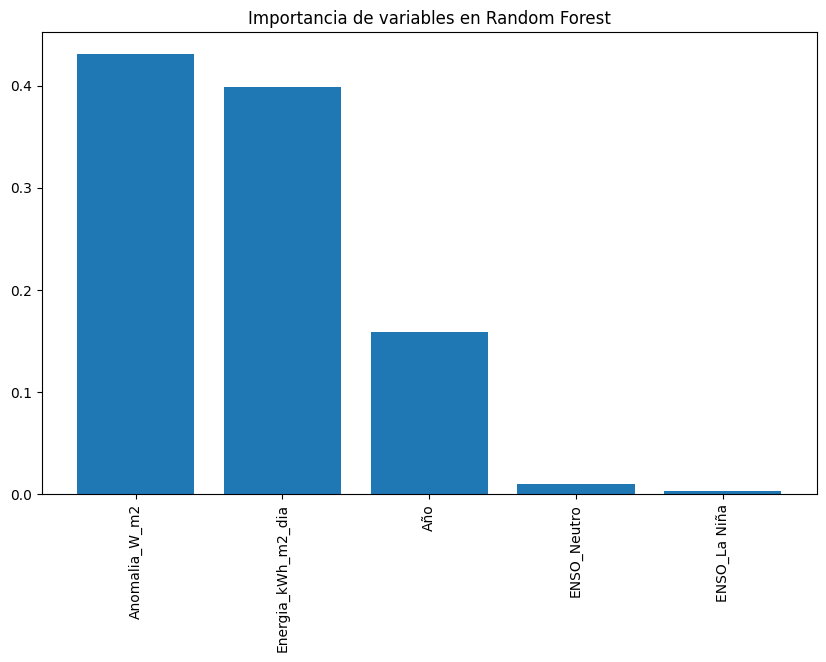

In [26]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

# Ordenar por importancia
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title("Importancia de variables en Random Forest")
plt.show()

In [27]:
import joblib

# Guardar el modelo entrenado
joblib.dump(rf, "modelo_random_forest_ICA_PM25.pkl")

# Descargar el archivo
from google.colab import files
files.download("modelo_random_forest_ICA_PM25.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import pandas as pd
import joblib
import ipywidgets as widgets
from IPython.display import display

# Cargar el modelo entrenado
rf = joblib.load("modelo_random_forest_ICA_PM25.pkl")

# Definir widgets
año = widgets.Dropdown(options=[2017, 2018, 2019, 2020], description="Año:")
energia = widgets.FloatText(value=5.0, description="kWh/m²/día:")
anomalia = widgets.FloatText(value=0.0, description="Anomalia W/m²:")
enso = widgets.Dropdown(options=["Neutro", "El Niño", "La Niña"], description="ENSO:")
fuente = widgets.Dropdown(options=["GOES-16"], description="Fuente:")

# Botón de predicción
button = widgets.Button(description="Predecir ICA_PM25")

# Función de predicción
def predecir(b):
    nuevo_df = pd.DataFrame({
        "Año": [año.value],
        "Energia_kWh_m2_dia": [energia.value],
        "Anomalia_w_m2": [anomalia.value],
        "ENSO": [enso.value],
        "Fuente": [fuente.value]
    })
    # Codificación igual que en entrenamiento
    nuevo_df = pd.get_dummies(nuevo_df, drop_first=True)
    for col in X.columns:
        if col not in nuevo_df.columns:
            nuevo_df[col] = 0
    nuevo_df = nuevo_df[X.columns]
    prediccion = rf.predict(nuevo_df)
    print("Predicción ICA_PM25:", prediccion[0])

button.on_click(predecir)

# Mostrar formulario
display(año, energia, anomalia, enso, fuente, button)

Dropdown(description='Año:', options=(2017, 2018, 2019, 2020), value=2017)

FloatText(value=5.0, description='kWh/m²/día:')

FloatText(value=0.0, description='Anomalia W/m²:')

Dropdown(description='ENSO:', options=('Neutro', 'El Niño', 'La Niña'), value='Neutro')

Dropdown(description='Fuente:', options=('GOES-16',), value='GOES-16')

Button(description='Predecir ICA_PM25', style=ButtonStyle())

Predicción ICA_PM25: Moderado
